In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import warnings
import time
import os

from macro_data_processing import convert_to_cst_unix
from visualization import visualize_heatmap
from visualization import visualize_heatmap_vt
from VT import gen_all_VT


Working on new input file: /Volumes/WorkLabJJ/Data/VT-tools_INCEPTION_v1/2022-11-21/637b023440527bf2daa5932f__post1_speed_smooth_lane1.csv
Date of input file: 2022-11-21
Time range 1669032000 to 1669046400


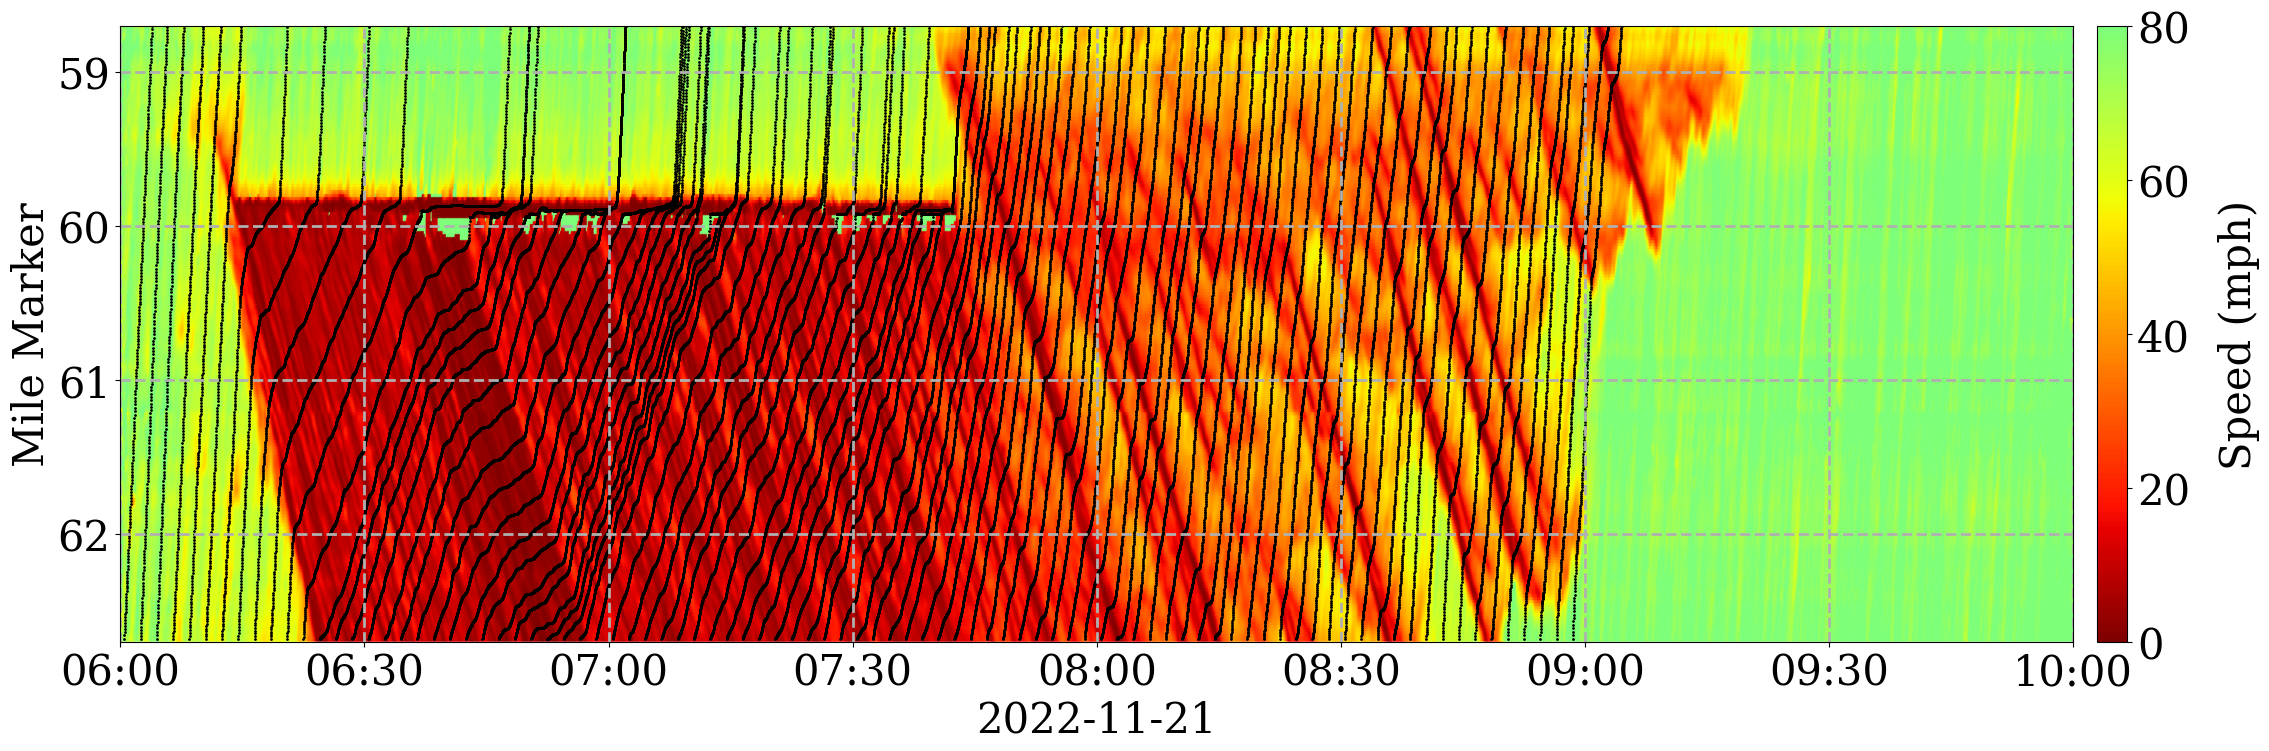

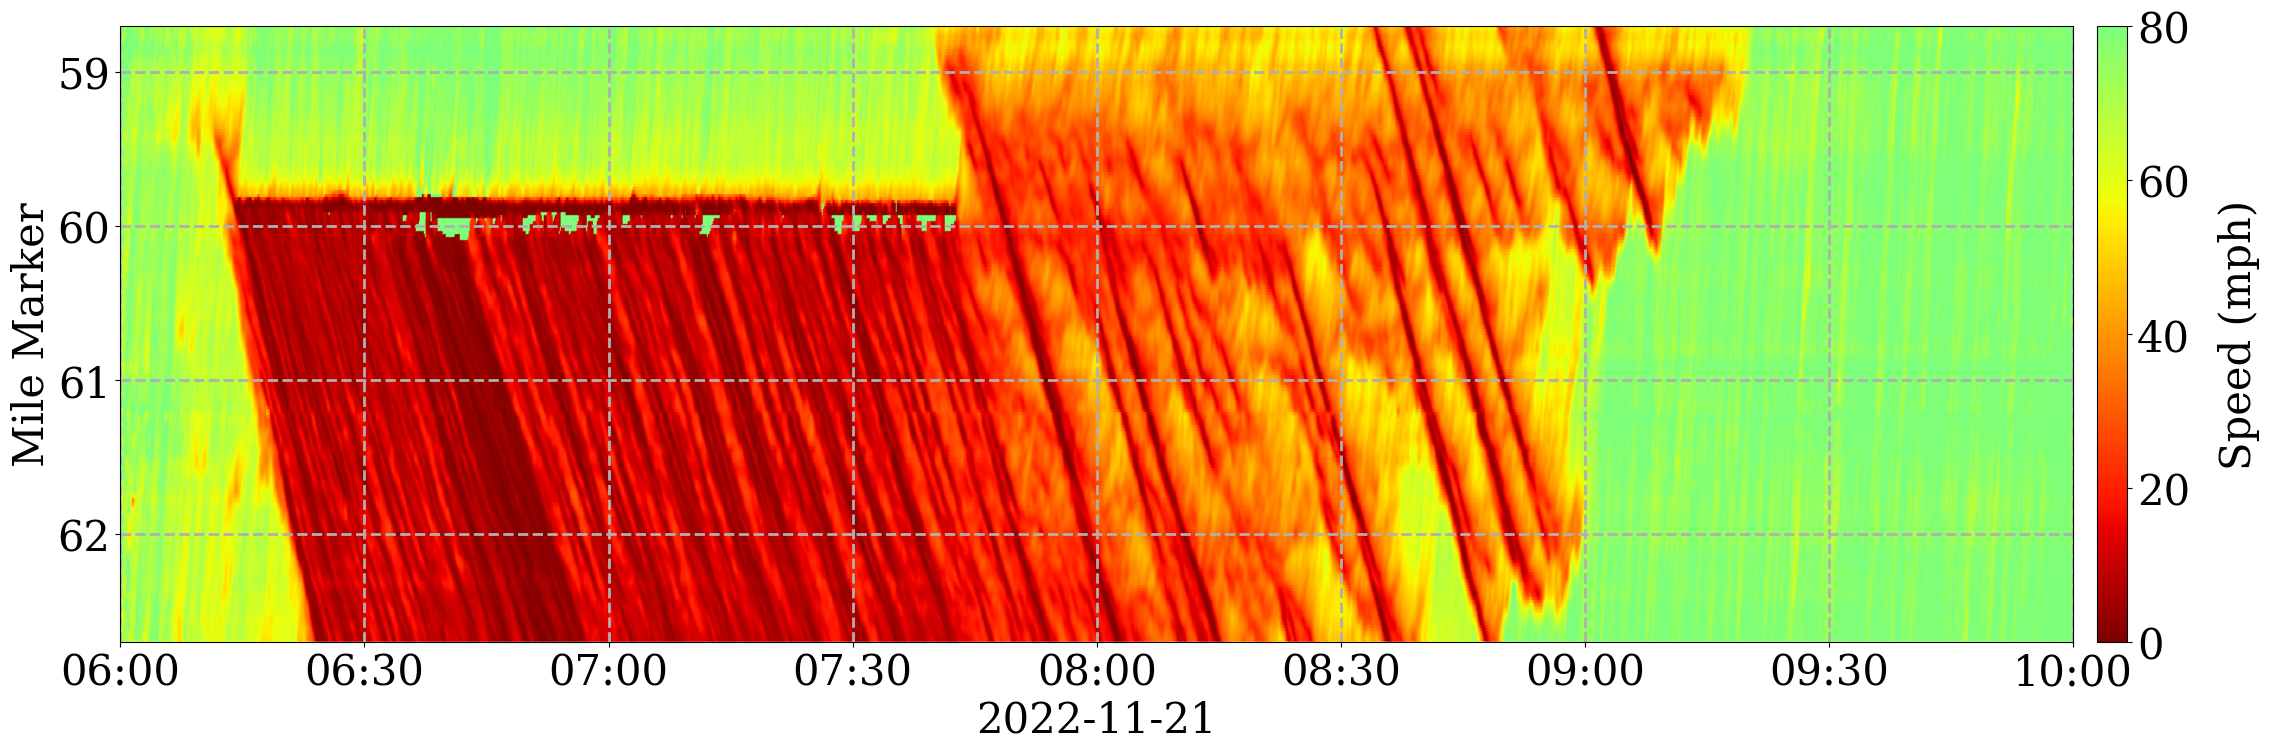


Working on new input file: /Volumes/WorkLabJJ/Data/VT-tools_INCEPTION_v1/2022-11-21/637b023440527bf2daa5932f__post1_speed_smooth_lane2.csv
Date of input file: 2022-11-21
Time range 1669032000 to 1669046400


In [ ]:
inception_root = '/Volumes/WorkLabJJ/Data/VT-tools_INCEPTION_v1/'
dirs = [dr for dr in os.listdir(inception_root) if dr[0] != '.']
for date_dir in dirs:
    starttime = convert_to_cst_unix(date_dir + ' 06:00')
    endtime = convert_to_cst_unix(date_dir + ' 10:00')
    data_files = [fn for fn in os.listdir(os.path.join(inception_root, date_dir)) 
                  if os.path.splitext(fn)[1] == '.csv' and 'smooth' in fn]
    if len(data_files) == 0:
        print("SKIPPING DIRECTORY {}\n".format(date_dir))
        continue
    for lane_data_file in data_files:
        lane_number = int(os.path.splitext(lane_data_file)[0].split('_')[-1][-1])
        input_file_path = os.path.join(inception_root, date_dir, lane_data_file)
        print(f"\nWorking on new input file: {input_file_path}")
        print(f"Date of input file: {date_dir}")
        print(f"Time range {starttime} to {endtime}")
        contains_dot_underscore = "._" in input_file_path
        if contains_dot_underscore==False:
            smooth_speed = pd.read_csv(input_file_path)
            vt_all = gen_all_VT(smooth_speed, frequency = 120, hour=3)
            vt_all.to_csv(os.path.join(inception_root, date_dir) + f'/vt_lane{lane_number}.csv', index=False)
            visualize_heatmap_vt(os.path.join(os.path.split(input_file_path)[0], f'lane{lane_number}'),
                                 smooth_speed, vt_all, starttime, endtime, dx=0.02, dt=4, fig_width=30, fig_height=8, minor_xtick=1800)
            visualize_heatmap(os.path.join(os.path.split(input_file_path)[0], f'lane{lane_number}'),
                      smooth_speed, starttime, endtime, dx=0.02, dt=4, fig_width=30, fig_height=8, minor_xtick=int(1800/4))